# Multi-Resolution Image Blending using OpenCV & PIL

The goal is to blend 2 images seamlessly using gaussian & laplacian pyramids. This is a form of image in-painting

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import cv2 as cv
import numpy as np

In [3]:
A = cv.imread('Hand.png', cv.IMREAD_REDUCED_COLOR_4)
# A = cv.resize(A, tuple((x//4 for x in A.shape[:2])))
print(A.shape)


B = cv.imread('Veles-Mask-Template.png', cv.IMREAD_REDUCED_COLOR_4)
# B = cv.resize(B, tuple((x//4 for x in A.shape[:2])))
print(B.shape)

M = cv.imread('Mask.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
# M = M // 255
print(M.shape)


(2016, 1512, 3)
(2016, 1512, 3)
(2016, 1512)


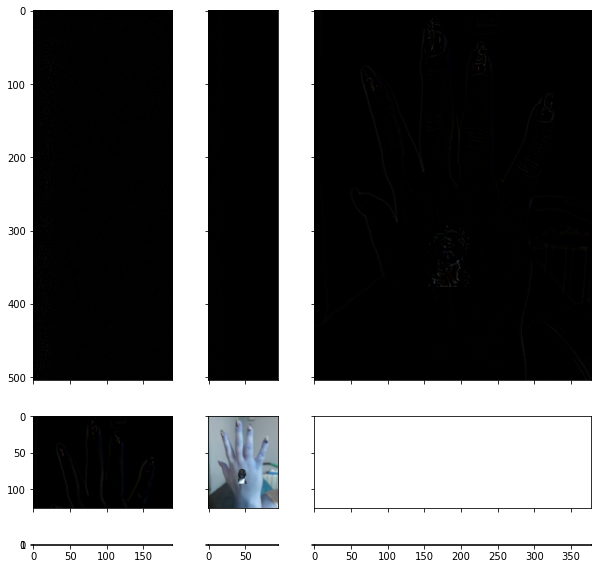

(252, 190, 3) - (252, 190, 3)
(504, 378, 3) - (504, 380, 3)
(1008, 756, 3) - (1008, 760, 3)
(2016, 1512, 3) - (2016, 1520, 3)


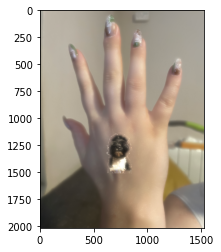

In [23]:
from pyramid import cv_laplacian, cv_pyramid, cv_multiresolution_blend, cv_reconstruct_laplacian
from helper import cv2pil, multiply_nn_mnn
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

gpA = cv_pyramid(A.copy(), scale=5)
gpB = cv_pyramid(B.copy(), scale=5)
gpM = cv_pyramid(M.copy(), scale=5)


lpA = cv_laplacian(gpA, scale=5)
lpB = cv_laplacian(gpB, scale=5)
lpM = cv_laplacian(gpM, scale=5)

# cv2pil(lpA[0]).show()
# cv2pil(lpB[0]).show()
# cv2pil(gpM[0]).show()

# lpM0 = gpM[0] // 255
# result0 = multiply_nn_mnn(lpM0, lpB[0]) + multiply_nn_mnn((1 - lpM0) , lpA[0])
# result0 = result0.astype(np.uint8)
# cv2pil(result0).show()

# TODO: Implement `reconstruct_laplacian` for cv2

# blended = cv.add(cv.pyrUp(gpA[1]), result0)
# cv2pil(blended).show()

# [cv2pil(x).show() for x in lpA]

blended_pyramid = cv_multiresolution_blend(gpM, lpA, lpB)
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )


for i in range(len(blended_pyramid)):
    ax = grid[i]
    ax.imshow(blended_pyramid[i])

plt.show()


blended_image = cv_reconstruct_laplacian(blended_pyramid)
blended_image = cv2pil(blended_image)
blended_image.save('cv_blended_image.png')
# blended_image.show()
plt.imshow(blended_image)